<a href="https://colab.research.google.com/github/Gaurav-Sharma21/DataScience-Track/blob/main/Linear/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import torch
import torch.nn as nn
import numpy as np

In [15]:
torch.__version__


'2.3.1+cu121'

In pytorch, everything is a tensor The tensors need to be on the same machine i.e either CPU or GPU


In [24]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad = True)

#Forward pass

y_hat = w * x
loss = (y_hat - y)**2

print(loss)

#Backward pass
loss.backward()
print(w.grad)


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


Linear Regression


In [28]:
import numpy as np

X = np.array([1,2,3,4], dtype = np.float32)
y = np.array([2,4,6,8], dtype = np.float32)

w = 0.0

#model prediction
def forward(x):
    return w * x

def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

#gradient
def gradient(x,y,y_pred):
    return (np.dot(2*x,y_pred - y)).mean()


print(f"prediciton before training : f(5) = {forward(5)}")



#Training
learning_rate = 0.01
n_iters = 20

for epochs in range(n_iters):
    y_pred = forward(X)
    l = loss(y, y_pred)
    dw = gradient(X,y,y_pred)

    # update the weights
    w -= learning_rate * dw

    if epochs % 2 == 0:
        print(f"epoch {epochs+1}: w = {w}, loss = {l}")


print(f"prediction after training: f(5) = {forward(5):0.3f}")


prediciton before training : f(5) = 0.0
epoch 1: w = 1.2, loss = 30.0
epoch 3: w = 1.871999988555908, loss = 0.7680001854896545
epoch 5: w = 1.9795200133323667, loss = 0.019660834223031998
epoch 7: w = 1.9967231869697568, loss = 0.0005033080233260989
epoch 9: w = 1.999475698471069, loss = 1.2884394891443662e-05
epoch 11: w = 1.9999160599708554, loss = 3.297340072094812e-07
epoch 13: w = 1.9999865984916685, loss = 8.487816671731707e-09
epoch 15: w = 1.9999978351593015, loss = 2.1679014139408537e-10
epoch 17: w = 1.9999996304512022, loss = 5.076827847005916e-12
epoch 19: w = 1.9999999165534972, loss = 1.3145040611561853e-13
prediction after training: f(5) = 10.000


1. Desing the model with number of inputs and outputs. Input size and output size, and define the forward pass with all the layers.
2. Contstruct the loss and optimizer
3. Do our training loop. (forward pass: compute prediction, backward pass: gradients, update weights and iterate)

In [38]:
# Doing everything with pytorch now
# Linear Regression using Pytorch

import torch
import torch.nn as nn # Neural Network model

X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)


X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)


input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim) -> None:
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)


    def forward(self, x):
        return self.lin(x)


model = LinearRegression(input_size, output_size)



print(f"prediciton before training : f(5) = {model(X_test).item():0.3f}")


#Training
learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for epochs in range(n_iters):
    y_pred = model(X)
    l = loss(y, y_pred)


    l.backward() # gradient of our loss

    # update the weights
    optimizer.step()

    #zero_gradients
    optimizer.zero_grad()
    if epochs % 2 == 0:
        [w, b] = model.parameters()
        print(f"epoch {epochs+1}: w = {w[0][0].item():0.3f}, loss = {l:0.8f}")


print(f"prediction after training: f(5) = {model(X_test).item():0.3f}")





4 1
prediciton before training : f(5) = -4.108
epoch 1: w = -0.328, loss = 61.54276276
epoch 3: w = 0.328, loss = 29.65685654
epoch 5: w = 0.784, loss = 14.30451298
epoch 7: w = 1.100, loss = 6.91254616
epoch 9: w = 1.320, loss = 3.35324740
epoch 11: w = 1.473, loss = 1.63926125
epoch 13: w = 1.580, loss = 0.81373668
epoch 15: w = 1.654, loss = 0.41598129
epoch 17: w = 1.706, loss = 0.22418585
epoch 19: w = 1.742, loss = 0.13155797
epoch 21: w = 1.768, loss = 0.08667883
epoch 23: w = 1.786, loss = 0.06479283
epoch 25: w = 1.798, loss = 0.05398043
epoch 27: w = 1.808, loss = 0.04850300
epoch 29: w = 1.814, loss = 0.04559746
epoch 31: w = 1.819, loss = 0.04393332
epoch 33: w = 1.823, loss = 0.04287001
epoch 35: w = 1.826, loss = 0.04209917
epoch 37: w = 1.828, loss = 0.04147219
epoch 39: w = 1.830, loss = 0.04091755
epoch 41: w = 1.832, loss = 0.04040076
epoch 43: w = 1.833, loss = 0.03990513
epoch 45: w = 1.835, loss = 0.03942267
epoch 47: w = 1.836, loss = 0.03894943
epoch 49: w = 1.83

In [3]:
# Working the linear regression from scratch for practice
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


epoch: 10, loss = 4311.0542
epoch: 20, loss = 3218.7319
epoch: 30, loss = 2428.1396
epoch: 40, loss = 1855.3325
epoch: 50, loss = 1439.9164
epoch: 60, loss = 1138.3751
epoch: 70, loss = 919.3120
epoch: 80, loss = 760.0469
epoch: 90, loss = 644.1755
epoch: 100, loss = 559.8208


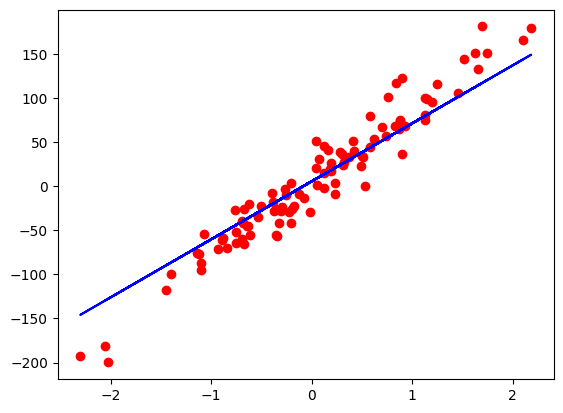

In [4]:
# Step 0: Prepare Data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

#Step 1: Model

input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)


#Step 2: Loss and Optimizer
ls = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#Step 3: Training Loop

n_itears = 100

for epochs in range(n_itears):
    #forward pass
    y_pred = model(X)
    #loss
    loss = ls(y_pred,y)
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    optimizer.zero_grad()

    if (epochs+1) % 10 == 0:
        print(f"epoch: {epochs+1}, loss = {loss.item():0.4f}")


#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy, "ro")
plt.plot(X_numpy,predicted, "b")
plt.show()

Logistic Regression.
Following are the 3 main steps:
1. Design the model(input, output, forward pass)
2. Constructing loss and optimizer function
3. Training loop with all the steps combined
Lastly, we can plot to see how the function model looks



In [6]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
#prepare data

bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples,n_features)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

#scaling the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))


y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

#model
# for logistic regression we have a linear function + a sigmoid
class LogisticRegression(nn.Module):
    def __init__(self,n_input_features):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred


model = LogisticRegression(n_features)

#loss and optimiser
learning_rate = 0.01
criterion = nn.BCELoss() # Binary Cross Entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#training loop
num_epochs = 100

for epoch in range(num_epochs):
    y_pred = model(X_train)

    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch +1}, loss = {loss.item():0.4f}")


with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = y_pred.round()
    acc = y_pred_class.eq(y_test).sum() / float(y_test.shape[0])
    print(f"accuracy = {acc:0.4f}")

569 30
epoch: 10, loss = 0.6731
epoch: 20, loss = 0.5267
epoch: 30, loss = 0.4407
epoch: 40, loss = 0.3851
epoch: 50, loss = 0.3461
epoch: 60, loss = 0.3170
epoch: 70, loss = 0.2944
epoch: 80, loss = 0.2761
epoch: 90, loss = 0.2610
epoch: 100, loss = 0.2483
accuracy = 0.9035
